# Principal Component Analysis

In [1]:
import pandas as pd

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [23]:
data = pd.DataFrame(pd.read_csv('wine/wine.data', header=None))
columns = [
    'class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium',
    'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
    'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline'
]

data.columns = columns
data.head()

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [25]:
data['class'].unique()

array([1, 2, 3])

In [26]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)
scaled_data

array([[0.        , 0.84210526, 0.1916996 , ..., 0.45528455, 0.97069597,
        0.56134094],
       [0.        , 0.57105263, 0.2055336 , ..., 0.46341463, 0.78021978,
        0.55064194],
       [0.        , 0.56052632, 0.3201581 , ..., 0.44715447, 0.6959707 ,
        0.64693295],
       ...,
       [1.        , 0.58947368, 0.69960474, ..., 0.08943089, 0.10622711,
        0.39728959],
       [1.        , 0.56315789, 0.36561265, ..., 0.09756098, 0.12820513,
        0.40085592],
       [1.        , 0.81578947, 0.66403162, ..., 0.10569106, 0.12087912,
        0.20114123]])

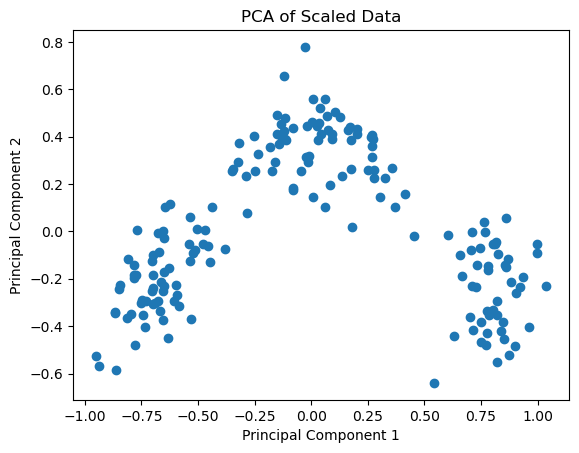

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=6)
pca_result = pca.fit_transform(scaled_data)

plt.scatter(pca_result[:, 0], pca_result[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Scaled Data')
plt.show()


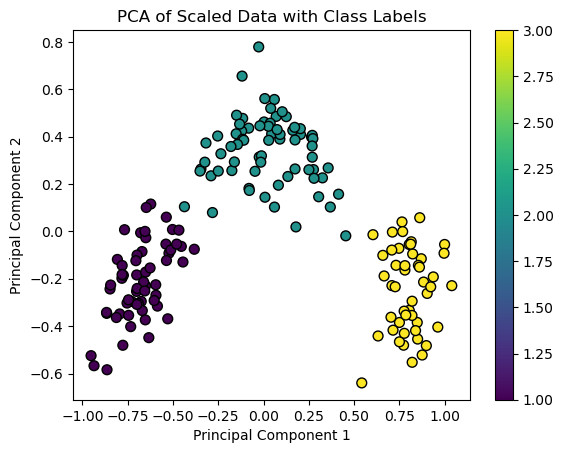

In [49]:
# Example: If you have a target column, you can color by class:
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=data['class'], cmap='viridis', edgecolor='k', s=50)
plt.colorbar()  # Show color bar
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Scaled Data with Class Labels')
plt.show()


In [39]:
print(f'Explained variance ratio: {pca.explained_variance_ratio_}')
print(f'Cumulative explained variance: {pca.explained_variance_ratio_.cumsum()}')

Explained variance ratio: [0.51003634 0.14853339 0.06702619 0.06257153 0.05009893 0.03837954]
Cumulative explained variance: [0.51003634 0.65856973 0.72559592 0.78816745 0.83826638 0.87664592]


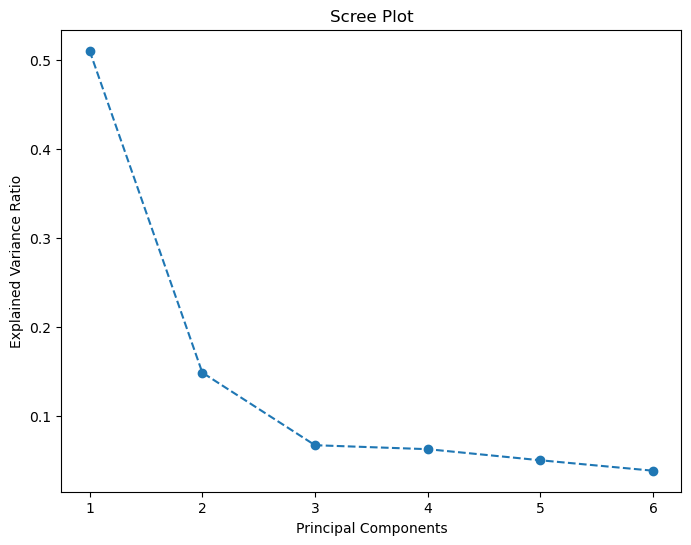

In [40]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.show()


In [42]:
print(f'PCA Components: {pca.components_}')

PCA Components: [[ 0.6293282  -0.11538334  0.18694541 -0.00605884  0.14898351 -0.06546653
  -0.29907772 -0.32479936  0.23920701 -0.18419798  0.08078851 -0.20189805
  -0.37170465 -0.2400427 ]
 [ 0.01993018 -0.54791647 -0.2344791  -0.16351603  0.07620456 -0.18485315
  -0.06219328  0.01015402 -0.02206778 -0.02268177 -0.52014852  0.24253447
   0.22768572 -0.43761144]
 [ 0.03341574 -0.08752348  0.49369469  0.39251169  0.47666736  0.01701346
   0.26790425  0.20701857  0.23278396  0.24925826 -0.02422129 -0.1201589
   0.30702977 -0.16025723]
 [-0.29258342  0.06222583 -0.17547483  0.20681556  0.04089069 -0.11406464
  -0.10022125 -0.07451451  0.79752561 -0.22126034 -0.08760114  0.27479592
  -0.08399171  0.17729834]
 [ 0.28148105 -0.16228821 -0.66493451  0.23497092  0.28992581  0.27654331
   0.20490882  0.12531803  0.0069295   0.25398196  0.27044136  0.11354174
  -0.16460973  0.0342759 ]
 [-0.13118319 -0.04725362  0.07955381  0.37438456  0.29955875  0.48981477
  -0.32001877 -0.1577103  -0.3454936

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(pca_result, data['class'], test_size=0.3, random_state=42)
model = LogisticRegression()

model.fit(X_train, y_train)
prediction = model.predict(X_test)
print(f"Accuracy: {(y_test == prediction).mean()}")

Accuracy: 1.0


In [47]:
from sklearn.cluster import KMeans

kms = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kms.fit_predict(pca_result)

/Users/ahmadtashfeen/opt/anaconda3/envs/pp/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


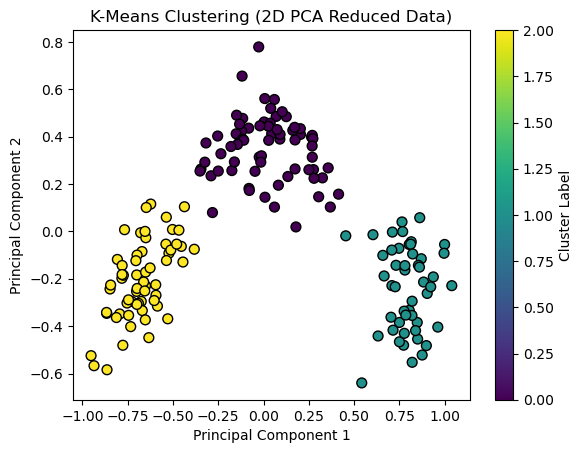

In [48]:
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=kmeans_labels, cmap='viridis', edgecolor='k', s=50)
plt.title('K-Means Clustering (2D PCA Reduced Data)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')  # Show color bar for cluster labels
plt.show()